<center>
<h1 style="color:#44546A;font-size:46px;">Celebrities Classifier</h1></center>

<h1>Introduction Génerale <h1>

Celebrities Classifier est un projet de classification d'images qui vise à identifier et à classer les images de trois célébrités distinctes qui sont Cristiano Ronaldo ,Emma Watson et Daniel Radcliffe. Le but de ce projet est d'utiliser les dernières techniques d'apprentissage automatique  pour créer un modèle précis et efficace capable de différencier ces célébrités à partir de leurs images. Le modèle de classification sera entraîné à partir d'un ensemble de données comprenant des images de ces célébrités et sera ensuite utilisé pour classifier de nouvelles images en fonction de leur appartenance à l'une des trois catégories de célébrités. Le projet vise à être une solution automatisée pour la reconnaissance de célébrités à grande échelle, qui pourrait être utilisée dans une variété de contextes.

In [2]:
#importer les bibleothèque necessaire 
import numpy as np 
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

CV2 fait référence à OpenCV, une bibliothèque open-source de vision par ordinateur et de traitement d'images. CV2 est un module Python pour OpenCV qui fournit une interface pour les fonctions d'OpenCV dans Python.

In [3]:
#lire une image à l'aide de la fonction imread de la bibleothèque cv2
img =cv2.imread('images.jpg')
img.shape

(238, 212, 3)

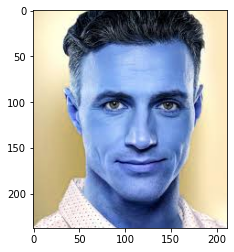

In [3]:
plt.imshow(img)

In [4]:
#convertir une image RGB en une une image noir et blanc
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(238, 212)

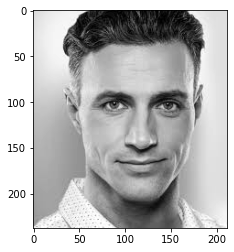

In [5]:
plt.imshow(gray,cmap='gray')

Haar Cascade est une méthode de détection d'objet utilisée dans la bibliothèque OpenCV. Elle est basée sur l'apprentissage de caractéristiques visuelles locales appelées "Haar-like features". Ces caractéristiques sont calculées pour une fenêtre glissante sur l'image, ce qui permet de détecter la présence d'objets dans l'image.

Pour détecter un objet spécifique, un classificateur basé sur un algorithme d'apprentissage supervisé est entraîné à partir d'un grand ensemble d'images positives et négatives. Les images positives sont celles qui contiennent l'objet d'intérêt, tandis que les images négatives ne le contiennent pas. Le classificateur est entraîné à distinguer les caractéristiques visuelles locales des images positives de celles des images négatives.

Une fois que le classificateur est entraîné, il est utilisé pour détecter l'objet dans de nouvelles images. Pour ce faire, une fenêtre glissante est utilisée pour explorer l'image et le classificateur est appliqué à chaque fenêtre. Si la fenêtre contient l'objet d'intérêt, elle est considérée comme une détection positive.

La méthode Haar Cascade est utilisée pour de nombreuses tâches de détection d'objet, notamment la détection de visages, de voitures, de piétons, de panneaux de signalisation, etc.

In [6]:
face_cascade=cv2.CascadeClassifier('./opencv/haarcascade_frontalface_default.xml')

In [7]:
faces_rect=face_cascade.detectMultiScale(gray,1.1,9)

In [8]:
for(x,y,w,h) in faces_rect:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

In [9]:
#cv2.imshow('detected faces',img)

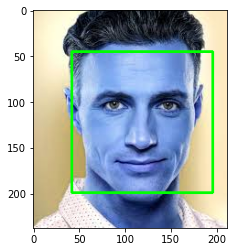

In [10]:
plt.figure()
plt.imshow(img,cmap='gray')
plt.show()

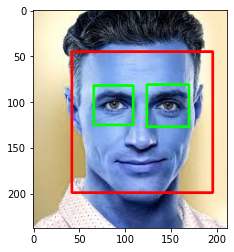

In [11]:
eye_cascade=cv2.CascadeClassifier('./opencv/haarcascade_eye.xml')
for (x,y,w,h) in faces_rect:
    img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray=gray[y:y+h,x:x+w]
    roi_color=img[y:y+h,x:x+w]
    eyes=eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
plt.figure()
plt.imshow(img,cmap='gray')
plt.show()  

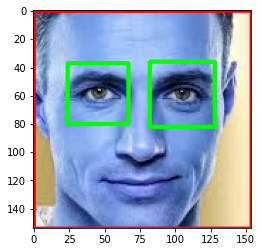

In [12]:
#afficher juste la partie de face rectangle 
plt.imshow(roi_color,cmap='gray')

In [13]:
#convertir l'image  roi_color en matrice 
cropped_img = np.array(roi_color)
cropped_img.shape

(154, 154, 3)

In [14]:
#Ecrire une fonction w2d qui convertir le cropped image en un image tel que il afficher ensuite à l'aide de bibleothèque pwyt
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

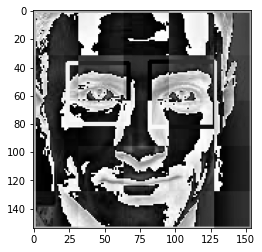

In [15]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [16]:
#ecrire une fonction qui accepte le path d'une image et retourne le cropped image si en detecte 2 yeux sinon elle ne retourne rien
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

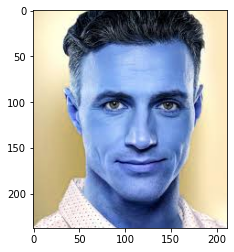

In [17]:
original_image = cv2.imread('images.jpg')
plt.imshow(original_image)

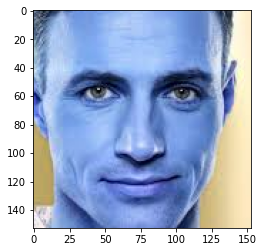

In [18]:
cropped_image = get_cropped_image_if_2_eyes('images.jpg')
plt.imshow(cropped_image)

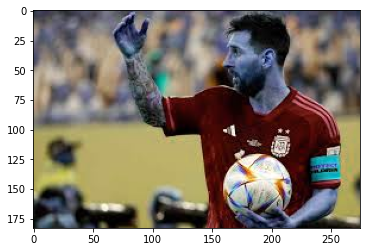

In [19]:
org_image_obstructed = cv2.imread('aa.jpg')
plt.imshow(org_image_obstructed)

In [68]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('aa.jpg')
cropped_image_no_2_eyes


<h1>Réalisation de projet <h1>

Dans le dossier de notre projet on a un dossier datasets qui contient les images de differentes celebrities qu'on veut les classer et identifier.

In [69]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

on crit une liste img_dirs qui contient le path de 3 dossiers contenir dans dataset

In [70]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [71]:
img_dirs

['./dataset/cristiano ronaldo',
 './dataset/Daniel Radcliffe',
 './dataset/emma watson']

Tester si on trouve un dossier nommer cropped dans le dossier dataset on le supprime et on le recrit de nouveau.Ce dossier va contenir ensuite les images cropped de notre 3 celebrities .

In [72]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [73]:
cropped_image_dirs = []
celebrity_file_names_dict = {}


for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./dataset/cropped/cristiano ronaldo
Generating cropped images in folder:  ./dataset/cropped/Daniel Radcliffe
Generating cropped images in folder:  ./dataset/cropped/emma watson


Creer un dictionnaire qui contient comme id le nom de celebrity et comme valeur le path de chaque image cropped dans le dossier cropped creer precedamment

In [74]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'cristiano ronaldo': ['./dataset/cropped/cristiano ronaldo\\cristiano ronaldo1.png',
  './dataset/cropped/cristiano ronaldo\\cristiano ronaldo10.png',
  './dataset/cropped/cristiano ronaldo\\cristiano ronaldo12.png',
  './dataset/cropped/cristiano ronaldo\\cristiano ronaldo13.png',
  './dataset/cropped/cristiano ronaldo\\cristiano ronaldo14.png',
  './dataset/cropped/cristiano ronaldo\\cristiano ronaldo15.png',
  './dataset/cropped/cristiano ronaldo\\cristiano ronaldo16.png',
  './dataset/cropped/cristiano ronaldo\\cristiano ronaldo17.png',
  './dataset/cropped/cristiano ronaldo\\cristiano ronaldo18.png',
  './dataset/cropped/cristiano ronaldo\\cristiano ronaldo19.png',
  './dataset/cropped/cristiano ronaldo\\cristiano ronaldo2.png',
  './dataset/cropped/cristiano ronaldo\\cristiano ronaldo20.png',
  './dataset/cropped/cristiano ronaldo\\cristiano ronaldo21.png',
  './dataset/cropped/cristiano ronaldo\\cristiano ronaldo22.png',
  './dataset/cropped/cristiano ronaldo\\cristiano ronaldo

In [75]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [76]:
#creer un dictionnaire qui contient le nom de celebrity comme id et un numero comme valeur 
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'cristiano ronaldo': 0, 'Daniel Radcliffe': 1, 'emma watson': 2}

on crit 2 listes X et y qui vont utiliser ensuite dans le modele de prediction.

In [77]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])   

In [ ]:
#scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1) 32*32*3 car scalled_raw_img est une image en couleur 
#donc 3 est pour le RGB et 32*32 car scalled_img_har est une image noir et blanc donc sans *3 

In [78]:
len(X[0])

4096

In [79]:
# convertir la liste X en array et convertir ses element en float 
#car en machine learning il est plus efficace de manipuler des float que des entier
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(200, 4096)

In [80]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.925

In [82]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86        11
           1       1.00      0.90      0.95        10
           2       0.90      1.00      0.95        19

    accuracy                           0.93        40
   macro avg       0.93      0.91      0.92        40
weighted avg       0.93      0.93      0.92        40



Essayer d'entrainer les donnees avec de differentes algo d'apprentissage et differents parametres pour choisir le meilleur entre eux.

In [83]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [84]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [85]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.91875,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.78750,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.91875,{'logisticregression__C': 5}


In [86]:
best_estimators['svm'].score(X_test,y_test)

0.925

In [87]:
best_estimators['random_forest'].score(X_test,y_test)

0.85

In [88]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.9

In [89]:
#en choisir le svm qui nous donne le meilleur score 
best_clf = best_estimators['svm']

In [90]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[11,  0,  0],
       [ 3,  7,  0],
       [ 0,  0, 19]], dtype=int64)

Text(69.0, 0.5, 'Truth')

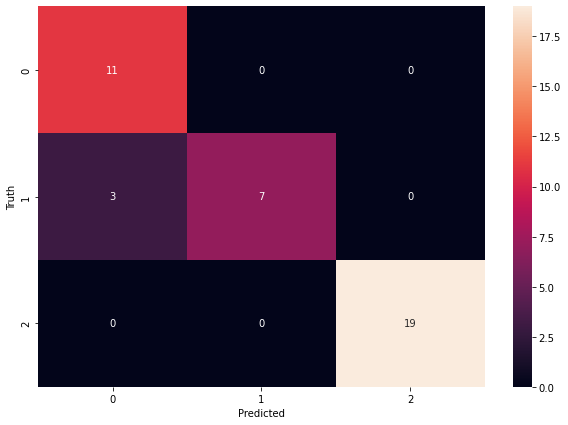

In [91]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h1>Save Model<h1>

In [61]:
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

<h1>Save class dictionary<h1>

In [63]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))